# <center>Health Status - Life Expectancy</center>

## Objective: 

Life expectancy at birth and at ages 40, 60, 65 and 80 years old is the average number of years that a person at that age can be expected to live, assuming that age-specific mortality levels remain constant. The Eurostat database (dataset Life expectancy by age and sex accessed in June 2019) is the main data source for all European countries, except Turkey.  Australian Bureau of Statistics:Australia, Statistics Canada:Canada, National Statistics Institute:Chile, Central Bureau of Statistics:Israel, Ministry of Health, Labour and Welfare:Japan, National Statistical Office:Korea, National Population Council (CONAPO):Mexico,Statistics New Zealand:New Zealand, Turkish Statistical Institute:Turkey, U.S. Department of Health and Human Services/Centers for Disease Control and Prevention/National Center for Health Statistics:USA, The World Bank, World Development Indicators online:Brazil, China, Columbia, India, Indonesia, South Africa,  National Institute of Statistics and Census (INEC):Costa Rica and Federal State Statistics Service: Russia are a few other sources of the statistics for other countries.

The objective of the study is to find Life Expectancy of humans in different countries of the world. Since life expectancy is an indicator of multiple factors like healthy and stress-free life, good environmental conditions for human survival, diet-values for healthy and long-live life etc finding the countries with highest and lowest life expectancies can help us in determining the best countries to live in/out. The data is plenty and huge with various sections like life expectancy of female at birth, female at 40, female at 60, female at 65, female at 80, male at birth, male at 40, male at 60, male at 65, male at 80 etc. Due to many sections of data, the current study is confined to a single section:life expectancies of females at birth in global countries. This confinement is because of the project and time limitation.

The goal is to read the statistics available for life expectancies from the website: https://stats.oecd.org/Index.aspx?DatasetCode=HEALTH_STAT. Then filter the data required for study(female at birth) and store it in a pandas dataframe, perform exploratory data analytics using data visualizations. From the analysis find the countries with highest and lowest life expectancies and recommend the countries with lowest life expectancy to improve the quality of life for healthy and long life. The study can help countries with lowest life expectancy to evaluate their life style, food habits, body health, enviroment etc and take measure to improve the life expectancy. They can also try to adopt certain aspects of life style from those with highest life expectancy to improve the numbers.


## Data Mining:


The website has a table consisting of more than 313 rows of data. Data for the current study is available in the first 44 rows; one for each country with columns as years: from the year 2010 to 2018. There are various sibling columns for a column in the table; for example, a few of the countries are grouped under:Non-OECD Economies. The dataset also included certain columns like the measure, variable being measured etc and a few blank columns.

1. Read the table data from website using BeautifulSoup library.
2. Store all the headers in a list, variable name: all_headers.
3. Store all rows data in a list(variable name:data) with each row of data in another list(variable name:col_data).
4. Few of the cells have (B) and (P) in their values. These cell values are repeated twice in that particular row list(variable name:col_data). Hence these values are ignored while reading from the website table.
5. Also there are certain blank column in the table that are ignored while reading and storing in the list(variable name:col_data).
6. The first four elements of the list(variable name:data) have blank values which are ignored.
7. The problem of sibling/grouped columns is overcome by checking the length of each row of data(variable name: each element in the list data). If the length is greater than 10(since country,2010-2018 includes 1+9 = 10 column values for each row), it indicates that row has more column data. The extra column data is always at the beginning of the list. Find the number of extra elements by subtracting 10 from the total list length(variable name:extra_elements) and preserve the elements from (variable name:)extra_elements till the end of the list. 
8. There are certain rows in the table with less than 10 column values. These rows are stored in a list (variable name:del_list) and are deleted from the actual data(variable name:data).
9. Above steps resulted in a formatted list, variable name:data. Each element in this list is a list/row of data with country and statistics of life expectancy from 2010-2018.
10. The list(variable name: data) is stored into a dataframe:country_df.
11. The values like:".." in the dataset are replace by Nan.
12. The columns 2010-2018 are converted into numeric datatype.
13. Data relevant to the current study(:life expectancy of female at birth in various countries) is stored in the dataframe(variable name:femle_birth_df). The relevant data is in the first 44 rows of the dataframe(variable name:country_df).
14. Since there is no much data for the year:2018 this column is completely ignored for the analysis.
15. The dataframe:femle_birth_df is used in performing analysis and data visualizations to draw insights on life expectancy of female at birth in various countries.

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

diab_url = "https://stats.oecd.org/Index.aspx?DatasetCode=HEALTH_STAT"
response_diab = requests.get(diab_url)
type(response_diab)
print(response_diab.status_code)
print(response_diab.encoding)
contents_diab = response_diab.content.decode(response_diab.encoding)

soup_diab = BeautifulSoup(contents_diab, "html.parser")
type(soup_diab)
txt_dump_diab = soup_diab.text
type(txt_dump_diab)

200
utf-8


str

In [2]:
tables_f = soup_diab.find_all('table', {'class':'DataTable'})
theads = soup_diab.find_all('th', {'class':'HDimName'})
print(theads)

theads_years = soup_diab.find_all('th', {'class':'HDim'})

years = []
for i in range(0,9):
    years.append(theads_years[i].text)
#years

theads = soup_diab.find_all('th', {'class':'VDimName'})
heads = []
for i in range(0,len(theads)-1):
    heads.append(theads[i].text)
all_headers = heads+years
all_headers = all_headers[2:]

all_headers

[<th class="HDimName" colspan="6" rowspan="3"><b><a class="dimensionSelectMemberButton" href="#" onclick="OpenDialog('./ModalTimeDimension.aspx?DimensionCode=YEA', 'Customize');">Year</a></b></th>]


['Country',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018']

In [3]:
data = [] 
row_marker = 0
for row in tables_f[0].find_all('tr'):
    column_marker = 0
    columns = row.find_all('td')
    col_data = []
    for column in columns:
        if not((column.get_text()).startswith("(B)")) and not((column.get_text()).startswith("(P)")) and column.get_text() != '':
            col_data.append(column.get_text())
    data.append(col_data)

data = data[4:]
data[0]

['Life expectancy',
 'Females at birth',
 'Years',
 'Australia',
 '84',
 '84.2',
 '84.3',
 '84.3',
 '84.4',
 '84.5',
 '84.6',
 '84.6',
 '..']

In [4]:
from functools import partial 
from operator import ne 

data_w_header = []
del_list =[]

for i in range(0,len(data)):

    if (len(data[i]) > 10):
        data_w_header.append(data[i]) 
        extra_elements = len(data[i]) - 10
        data[i] = data[i][extra_elements:]
    elif (len(data[i]) < 10):
        del_list.append(data[i])
    

for i in del_list:
    data = list(filter(partial(ne, i), data))

data[0]

['Australia',
 '84',
 '84.2',
 '84.3',
 '84.3',
 '84.4',
 '84.5',
 '84.6',
 '84.6',
 '..']

In [5]:
country_df = pd.DataFrame(data, columns =all_headers)
country_df.replace('..', np.nan, inplace=True)
country_df[['2010','2011','2012','2013','2014','2015','2016','2017','2018']] = country_df[['2010','2011','2012','2013','2014','2015','2016','2017','2018']].apply(pd.to_numeric)

femle_birth_df = country_df.iloc[0:44,0:9]

#fem_mal_diff_df = country_df.iloc[44:88,0:9]
#fem_at_40_df = country_df.iloc[88:124,0:9]
#fem_mal_diff_40_df = country_df.iloc[124:160,0:9]
#fem_at_60_df = country_df.iloc[160:196,0:9]
#fem_mal_diff_60_df = country_df.iloc[196:232,0:9]
#fem_at_65_df = country_df.iloc[232:271,0:9]
#fem_mal_diff_65_df = country_df.iloc[271:311,0:9]

femle_birth_df.head()

,Country,2010,2011,2012,2013,2014,2015,2016,2017
0,Australia,84.0,84.2,84.3,84.3,84.4,84.5,84.6,84.6
1,Austria,83.5,83.8,83.6,83.8,84.0,83.7,84.1,84.0
2,Belgium,83.0,83.3,83.1,83.2,83.9,83.4,84.0,83.9
3,Canada,83.3,83.5,83.6,83.8,83.9,83.9,84.0,84.0
4,Chile,80.9,81.4,81.3,82.4,82.5,82.7,83.1,NaN


## Findings:

### 1. Bar Plot: Each country's life expectancy of female at birth in 2010 and 2017:

Sort femle_birth_df by 2010 values and extract 2010 and 2017 columns for all countries.
Plot a bar graph to interpret the changes in life expectancy of female at birth in each country from 2010 to 2017.

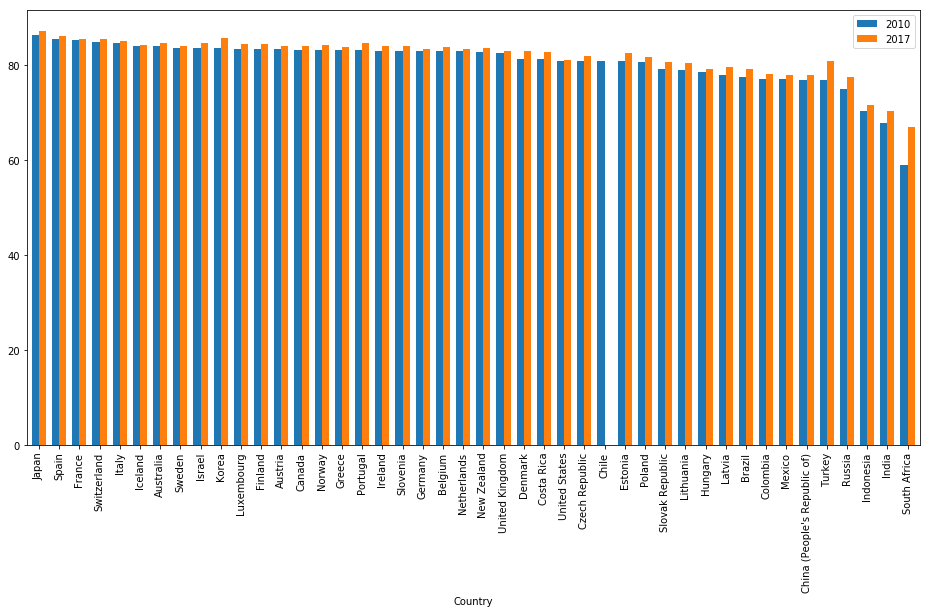

In [12]:
femle_birth_df_top_2010_2017 = femle_birth_df.sort_values(by='2010',ascending=False)[['Country','2010','2017']]
femle_birth_df_top_2010_2017.plot(x='Country',y=['2010','2017'],kind="bar",figsize=(16,8),width=0.7)

#### Inferences: 

Japan continued to be on the top in terms of life expectancy of female at birth and South Africa continued to be on the bottom.   
Most of the countries have a life expectancy greater than 80 except the bottom 3-5.   
There is an increase in the number of years of life for every country from 2010 to 2017.   
There is a significant increase in the life expectancy from 2010 to 2017 for South Africa.   
Most of the European countries have high life expectancy when compared to other continents.   
The countries with lowest life expectancy is a mix of European,Asian, African and American countries.

### 2. Histogram: Each country's life expectancy of female at birth from 2010 to 2017:

Using the columns of femle_birth_df plot a histogram to find how many countries have a commom life expectancy numbers from 2010 to 2017.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F2F0031630>,
      dtype=object)

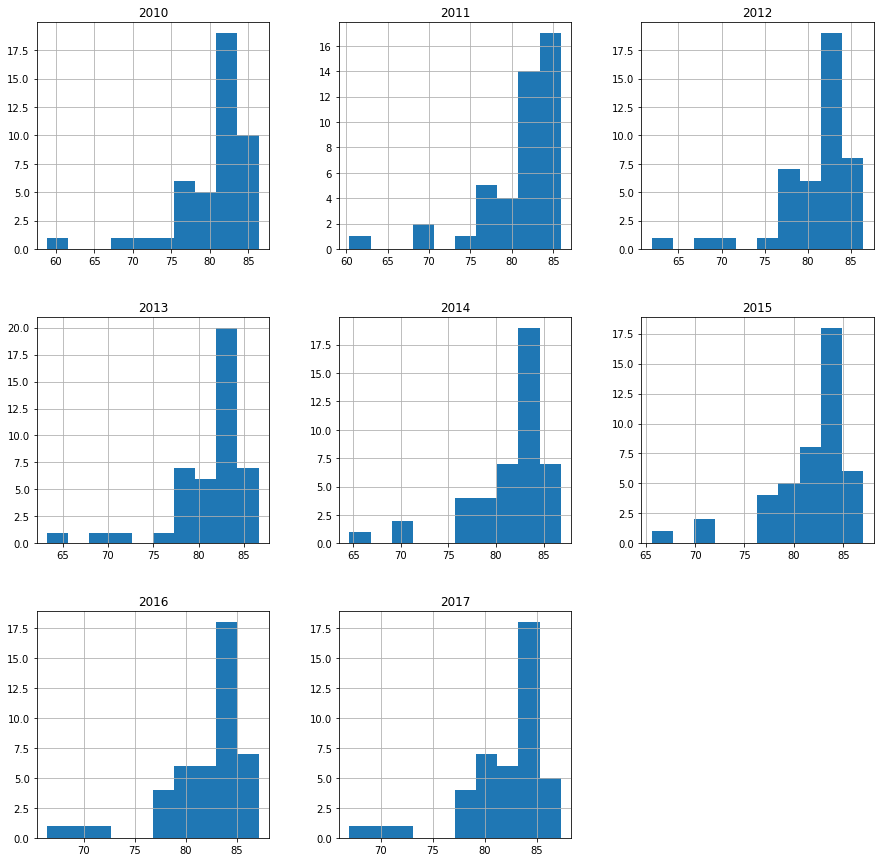

In [7]:
import matplotlib.pyplot as plt 

femle_birth_df_plt = femle_birth_df.iloc[:,1:]
femle_birth_df_plt
ax = femle_birth_df_plt.hist(figsize=(15,15))
ax


#### Inferences: 

Most of the countries have a life expectancy greater than 80 from 2010 to 2017.   
Many countries seem to have a life expectancy greater than 80 during 2012-2014 when compared to other years and it was highest in 2013 when compared to other years.   
The years of life has slowly drifter towards higher numbers from 2010 to 2017 and more countries have a life expectancy of 85 in 2017 than in 2010.     
Similarly the countries with low life years also drifted towards higher numbers. The lowest in 2010 was 59 and the lowest in 2017 is 68.    
The highest number of years of life has also increased from 2010 to 2017. It was 86 in 2010 and 87 in 2017.   

### 3. Line Graph: Top 10 Countries with highest life expectancy of female at birth from 2010 to 2017:

From femle_birth_df sort values by years(2010-2017); one at a time; and get the top 10 countries for every sort.
If the resulting data had considerable number of Nan values, that country is ignored for the plot.

Plot a line graph to understand the trend of the top 10 countries with highest life expectancy of female at birth from 2010 to 2017.

In [8]:
femle_birth_df_top1_2017 = femle_birth_df.sort_values(by='2017',ascending=False)[['Country','2017']].head(10)
femle_birth_df_top1_2016 = femle_birth_df.sort_values(by='2016',ascending=False)[['Country','2016']].head(10)
femle_birth_df_top1_2015 = femle_birth_df.sort_values(by='2015',ascending=False)[['Country','2015']].head(10)
femle_birth_df_top1_2014 = femle_birth_df.sort_values(by='2014',ascending=False)[['Country','2014']].head(10)
femle_birth_df_top1_2013 = femle_birth_df.sort_values(by='2013',ascending=False)[['Country','2013']].head(10)
femle_birth_df_top1_2012 = femle_birth_df.sort_values(by='2012',ascending=False)[['Country','2012']].head(10)
femle_birth_df_top1_2011 = femle_birth_df.sort_values(by='2011',ascending=False)[['Country','2011']].head(10)
femle_birth_df_top1_2010 = femle_birth_df.sort_values(by='2010',ascending=False)[['Country','2010']].head(10)
femle_birth_df_top1_2010
femle_birth_df_top1 = pd.concat([femle_birth_df_top1_2010,femle_birth_df_top1_2011,femle_birth_df_top1_2012,femle_birth_df_top1_2013,femle_birth_df_top1_2014,femle_birth_df_top1_2015,femle_birth_df_top1_2016,femle_birth_df_top1_2017], axis=1)
femle_birth_df_top1 = femle_birth_df_top1.loc[:,~femle_birth_df_top1.columns.duplicated()]
femle_birth_df_top1 = femle_birth_df_top1.T
femle_birth_df_top1 = femle_birth_df_top1[[0,9,16,17,18,30,32]]
femle_birth_df_top1.columns = femle_birth_df_top1.iloc[0]
femle_birth_df_top1 = femle_birth_df_top1.iloc[1:,:]
femle_birth_df_top1 = femle_birth_df_top1[['Australia','France','Italy','Japan','Korea','Spain','Switzerland']]

femle_birth_df_top1

Country,Australia,France,Italy,Japan,Korea,Spain,Switzerland
2010,84,85.3,84.7,86.3,83.6,85.5,84.9
2011,84.2,85.7,84.8,85.9,84,85.6,85
2012,84.3,85.4,84.8,86.4,84.2,85.5,84.9
2013,84.3,85.6,85.2,86.6,84.6,86.1,85
2014,84.4,86.1,85.6,86.8,85,86.2,85.4
2015,84.5,85.6,84.9,87,85.2,85.7,85.1
2016,84.6,85.7,85.6,87.1,85.4,86.3,85.6
2017,84.6,85.6,85.2,87.3,85.7,86.1,85.6


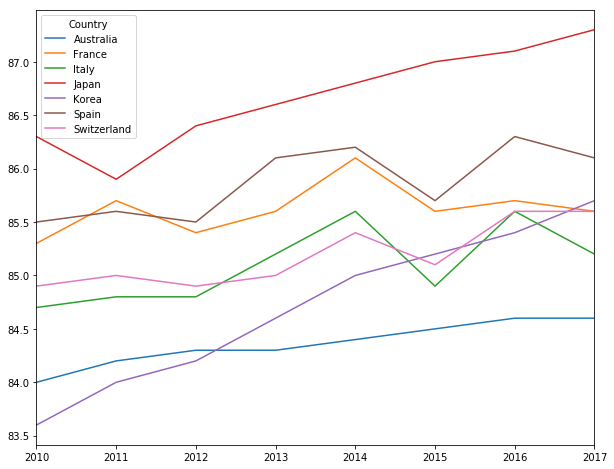

In [9]:
ax = femle_birth_df_top1.plot(figsize=(10,8))
ax

#### Inferences: 

Japan is always at the top from 2010 to 2017 with a life expectancy of 85 and above all through.   
Korea was at the lowest life expectancy in 2010. However there is a significant raise and it took third highest place in 2017.    
All of the top countries has increased the life expectancy numbers from 2010 to 2017.    
Italy was at the third lowest in 2010 and it dipped to second lowest in 2017 when compared to other top countries.    
Australia was at the second lowest in 2010 and fell down to the lowest in 2017 when compared to other top countries.   
Spain continued to stay at the second highest place in terms of life expectancy of female at birth from 2010 to 2017.  


### 4. Lollipop Chart: Bottom 10 Countries with lowest life expectancy of female at birth from 2010 to 2017:

From femle_birth_df sort values by years(2010-2017); one at a time; and get the bottom 10 countries for every sort.
If the resulting data had considerable number of Nan values, that country is ignored for the plot.

Plot a lollipop graph to understand the trend of the bottom 10 countries with lowest life expectancy of female at birth from 2010 to 2017.

In [10]:
femle_birth_df_bot1_2017 = femle_birth_df.sort_values(by='2017',ascending=False)[['Country','2017']].tail(10)
femle_birth_df_bot1_2016 = femle_birth_df.sort_values(by='2016',ascending=False)[['Country','2016']].tail(10)
femle_birth_df_bot1_2015 = femle_birth_df.sort_values(by='2015',ascending=False)[['Country','2015']].tail(10)
femle_birth_df_bot1_2014 = femle_birth_df.sort_values(by='2014',ascending=False)[['Country','2014']].tail(10)
femle_birth_df_bot1_2013 = femle_birth_df.sort_values(by='2013',ascending=False)[['Country','2013']].tail(10)
femle_birth_df_bot1_2012 = femle_birth_df.sort_values(by='2012',ascending=False)[['Country','2012']].tail(10)
femle_birth_df_bot1_2011 = femle_birth_df.sort_values(by='2011',ascending=False)[['Country','2011']].tail(10)
femle_birth_df_bot1_2010 = femle_birth_df.sort_values(by='2010',ascending=False)[['Country','2010']].tail(10)
femle_birth_df_bot1_2010
femle_birth_df_bot1 = pd.concat([femle_birth_df_bot1_2010,femle_birth_df_bot1_2011,femle_birth_df_bot1_2012,femle_birth_df_bot1_2013,femle_birth_df_bot1_2014,femle_birth_df_bot1_2015,femle_birth_df_bot1_2016,femle_birth_df_bot1_2017], axis=1)
femle_birth_df_bot1 = femle_birth_df_bot1.loc[:,~femle_birth_df_bot1.columns.duplicated()]
femle_birth_df_bot1 = femle_birth_df_bot1.T
femle_birth_df_bot1 = femle_birth_df_bot1[[22,36,37,38,40,41,42,43]]
femle_birth_df_bot1.columns = femle_birth_df_bot1.iloc[0]
femle_birth_df_bot1 = femle_birth_df_bot1.iloc[1:,:]
#femle_birth_df_bot1 = femle_birth_df_bot1[['Australia','France','Italy','Japan','Korea','Spain','Switzerland']]

femle_birth_df_bot1 = femle_birth_df_bot1.T
femle_birth_df_bot1

,2010,2011,2012,2013,2014,2015,2016,2017
Country,,,,,,,,
Mexico,77,77.2,77.3,77.4,77.5,77.7,77.8,77.9
Brazil,77.6,77.9,78.2,78.5,78.7,78.9,79.1,79.3
China (People's Republic of),76.8,77,77.2,77.3,77.5,77.7,77.8,78
Colombia,77,77.2,77.3,77.5,77.7,77.8,78,78.2
India,67.8,68.3,68.8,69.2,69.6,69.9,70.2,70.4
Indonesia,70.3,70.5,70.6,70.8,71,71.2,71.4,71.6
Russia,74.9,75.6,75.9,76.3,76.5,76.7,77.1,77.6
South Africa,58.9,60.4,61.9,63.3,64.6,65.6,66.4,67


Text(0.5, 0, 'Life Expectancy in years')

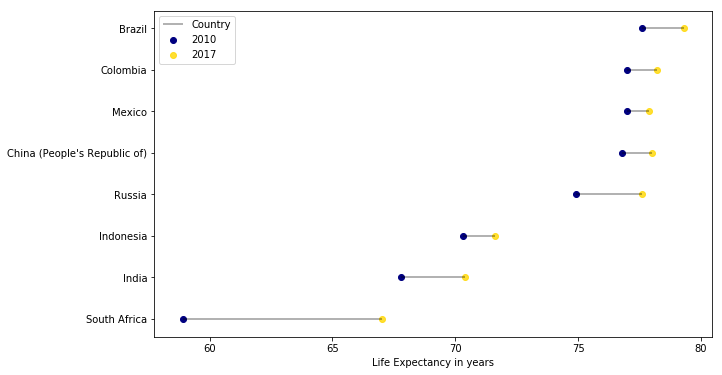

In [11]:
ordered_df = femle_birth_df_bot1.sort_values(by='2010')
my_range=(ordered_df.index)

fig, ax = plt.subplots(1,1,figsize=(10,6))

ax.hlines(y=my_range, xmin=ordered_df['2010'], xmax=ordered_df['2017'], color='black', alpha=0.4)
ax.scatter(ordered_df['2010'], my_range, color='navy', alpha=1, label='2010')
ax.scatter(ordered_df['2017'], my_range, color='gold', alpha=0.8 , label='2017')
ax.legend()
ax.set_xlabel('Life Expectancy in years')

#### Inferences: 

South Africa's life expectancy increased signifiantly from 2010 to 2017. But still it takes the lowest place.     
Russia and India are ranked second to have significant increase in number of years of life from 2010 to 2017. But India continued to be at second lowest position.   
Only 3 countries have life expectancy less than 75 even by 2017 - South Africa, India and Indonesia. Remaining countries have life expectancy greater than 75 but less than 80.     
Indonesia continued at the third lowest position from 2010 to 2017.   
There is no significant increase in number of years of life in Mexico from 2010 to 2017 followed by Indonesia, China and Colombia. 


## Recommendations:



1. There is an increase in the number of years of life for every country from 2010 to 2017. 
2. Most of the European countries have high life expectancy when compared to other continents. 
3. Most of the countries have a life expectancy greater than 80 from the year 2010 to 2017 and it was highest(20 countries) in 2013 when compared to other years. 
4. More countries have a life expectancy of 85 in 2017 than in 2010. 
5. The years of life has slowly drifted towards higher numbers from 2010 to 2017 which indicates that females at birth are living more number of years in 2017 than in 2010.
6. The countries with lowest life expectancy is a mix of European,Asian, African and American countries.
7. The lowest life expectancy in 2010 was 59 and in 2017 is 68. 
8. Only 3 countries have life expectancy less than 75 even by 2017 - South Africa, India and Indonesia. 

### Countries with highest life expectancy:
9. Japan continues to be on the top in terms of life expectancy of females at birth with a life expectancy of 85 and above all through from 2010 to 2017.
10. Spain continued to stay at the second highest place in terms of life expectancy of female at birth from 2010 to 2017. 
11. Australia was at the second lowest  among top 10 countries with high life expectancy in 2010 and fell down to the lowest of top 10 in 2017. 
12. Korea was at the lowest among top 10 countries with high life expectancy in 2010. However there is a significant raise and it took third highest place in 2017.  
13. Italy was at the third lowest among top 10 highest life expectancy countries in 2010 and it dipped to second lowest in 2017 of top 10. 


### Countries with lowest life expectancy:
14. South Africa continues to be on the lowest from 2010 to 2017 inspite of the significant increase from 59 in 2010 to 68 in 2017. 
15. Russia and India are ranked second to have significant increase in number of years of life from 2010 to 2017. But India continued to be at second lowest position.
16. Indonesia continued at the third lowest position from 2010 to 2017.
17. There is no significant increase in number of years of life in Mexico from 2010 to 2017 followed by Indonesia, China and Colombia. 


### Overall:
18. South Africa has significant raise in numbers of life expectancy from 2010 to 2017. Hence it should continue to encourage the measures that were taken to increase the life expectancy.
19. India and Indonesia must take measures to increase the life expectancy of female at birth since they have the lowest ranking of 44 countries.
20. Mexico, China and Colombia follows next and hence they have to look for factors that can increase the life expectancy of female at birth.
21. Japan and Spain excellent in making to the top all the time and help the lowest ranked countries to improve the numbers by suggestions.
22. Since Italy could succeed in increasing its numbers from 2010 to 2017, it can probably help the other lower countries in providing methods that increased the numbers.

 